In [2]:
# Cell loads the data

from dataset_loader import data_loader, get_descriptors, one_filter, data_scaler
import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
from sklearn import preprocessing
# file name and data path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
base_path = os.getcwd()
file_name = 'data/CrystGrowthDesign_SI.csv'

"""
Data description.

    Descriptors:
        'void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest'
    Source task:
        'H2@100 bar/243K (wt%)'
    Target tasks:
        'H2@100 bar/130K (wt%)' 'CH4@100 bar/298 K (mg/g)' '5 bar Xe mol/kg' '5 bar Kr mol/kg'
"""

descriptor_columns = ['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']
one_filter_columns = ['H2@100 bar/243K (wt%)'] 
another_filter_columns = ['H2@100 bar/130K (wt%)'] 

# load data
data = data_loader(base_path, file_name)

# extract descriptors and gas adsorptions
one_property = one_filter(data, one_filter_columns)
descriptors = get_descriptors(data, descriptor_columns)

# prepare training inputs and outputs
X = np.array(descriptors.values, dtype=np.float32)
y = np.array(one_property.values, dtype=np.float32).reshape(len(X), )
X = data_scaler(X)
y = data_scaler(y.reshape(-1, 1)).reshape(len(X),)
# removes catagorical varaiables
test=data.drop(["MOF ID","topology","First nodular character","Second nodular character"],axis=1)
#g_comp=5
# all vs just used !!!! uncomment below for just feature used anaylsis
g_comp=5
test=test[['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']]
g=preprocessing.StandardScaler().fit_transform(test)
g=pd.DataFrame(g)
g.columns=test.columns
test=g

2
3
There were 4 components with net varance explained 0.9580192390268892, this only support plotting 2


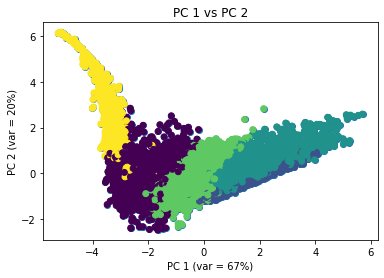

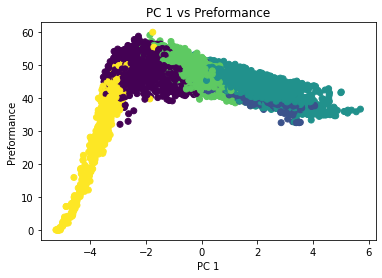

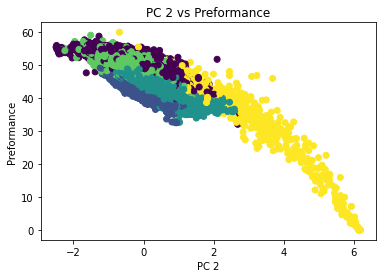

NameError: name 'average_val' is not defined

In [3]:
# made my own helper functions 
# just plots pca 1,2 with how ever many gausian clusters on test data
from Statistics_helper import make_pca_gausian_fit
var=.9
_,color=make_pca_gausian_fit(test,var,g_comp,array_out=True)
# run anaylsis of PC vs preformance of absorbtion based on cluster found above
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.show()
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
pc1=a.T[:][0]
pc2=a.T[:][1]
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
# Notice that the clusters are verticle..
# mean cluster analysis (colors do not match above yet)
ave_by_c=average_val.groupby(by="Cluster").mean()
plt.title("PC 2 vs Preformance (by cluster mean)")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(ave_by_c["PC1"],ave_by_c["H2@100 bar/77K (g/L)"])
plt.show()
plt.title("PC 2 vs Preformance (by cluster mean)")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(ave_by_c["PC2"],ave_by_c["H2@100 bar/77K (g/L)"])

In [4]:
# Cell loads the data
from dataset_loader import data_loader, get_descriptors, one_filter, data_scaler
import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
# file name and data path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
base_path = os.getcwd()
file_name = 'data/CrystGrowthDesign_SI.csv'
"""
Data description.

    Descriptors:
        'void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest'
    Source task:
        'H2@100 bar/243K (wt%)'
    Target tasks:
        'H2@100 bar/130K (wt%)' 'CH4@100 bar/298 K (mg/g)' '5 bar Xe mol/kg' '5 bar Kr mol/kg'
"""

descriptor_columns = ['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']
one_filter_columns = ['H2@100 bar/243K (wt%)'] 
another_filter_columns = ['H2@100 bar/130K (wt%)'] 

# load data
data = data_loader(base_path, file_name)

# extract descriptors and gas adsorptions
one_property = one_filter(data, one_filter_columns)
descriptors = get_descriptors(data, descriptor_columns)

# prepare training inputs and outputs
X = np.array(descriptors.values, dtype=np.float32)
y = np.array(one_property.values, dtype=np.float32).reshape(len(X), )
X = data_scaler(X)
y = data_scaler(y.reshape(-1, 1)).reshape(len(X),)
# removes catagorical varaiables
test=data.drop(["MOF ID","topology","First nodular character","Second nodular character"],axis=1)
# all vs just used !!!! uncomment below for just feature used anaylsis
g_comp=6
test=test[['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']]
g=preprocessing.StandardScaler().fit_transform(test)
g=pd.DataFrame(g)
g.columns=test.columns
test=g

2
3
There were 4 components with net varance explained 0.9580192390268892 (max iter = 100), this only support plotting 2


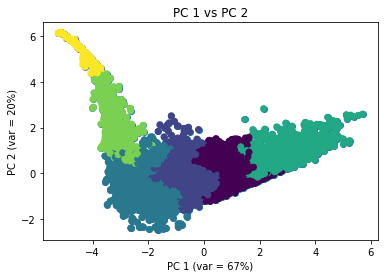

In [5]:
# made my own helper functions 
# just plots pca 1,2 with how ever many gausian clusters on test data
from Statistics_helper import make_pca_agg_fit
from sklearn.cluster import AgglomerativeClustering
var=.9
_,color=make_pca_agg_fit(test,var,g_comp,array_out=True)

# Notice that the clusters are verticle..

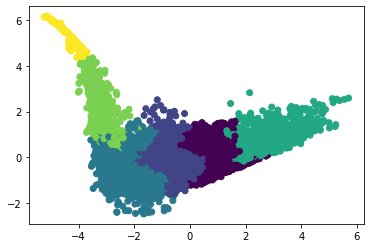

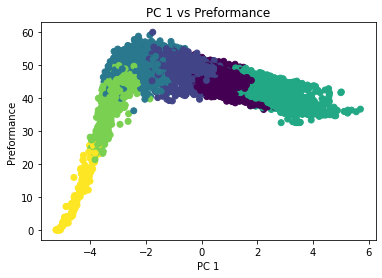

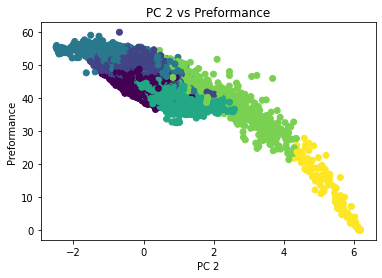

In [6]:
# run anaylsis of PC vs preformance of absorbtion based on cluster found above
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
pc1=a.T[:][0]
pc2=a.T[:][1]
plt.scatter(pc1,pc2,c=color)
plt.show()
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()

2
3
There were 4 components with net varance explained 0.9580192390268892 (max iter = 100), this only support plotting 2


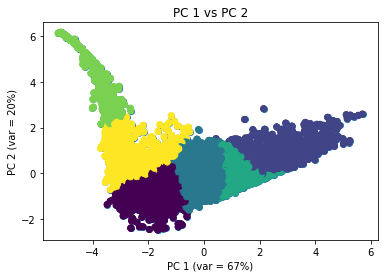

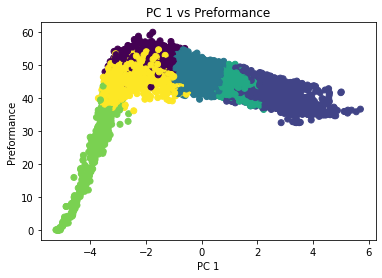

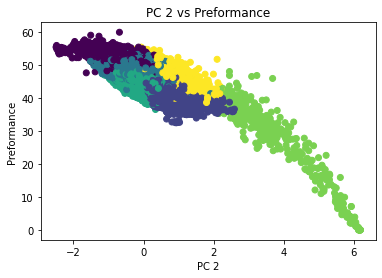

In [7]:
from sklearn.cluster import KMeans
_,color=make_pca_agg_fit(test,var,g_comp,func_give=KMeans,array_out=True)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
pc1=a.T[:][0]
pc2=a.T[:][1]
plt.scatter(pc1,pc2,c=color)
plt.show()
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()

In [8]:

from sklearn.model_selection import train_test_split
test=data.drop(["MOF ID","topology","First nodular character","Second nodular character"],axis=1)
#g_comp=5
# all vs just used !!!! uncomment below for just feature used anaylsis
g_comp=5
test=test[['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest','H2@100 bar/77K (g/L)']]
X=test
Y_label="H2@100 bar/77K (g/L)"
g=preprocessing.StandardScaler().fit_transform(test)
g=pd.DataFrame(g)
g.columns=X.columns
X=g
X["Cluster"]=color
Y=X[str(Y_label)]
X.drop([Y_label],axis=1)
print(X)
output=False
X_train=pd.DataFrame([])
X_test=pd.DataFrame([])
y_train=pd.DataFrame([])
y_test=pd.DataFrame([])
if output:
    Cluster_df=[]
for i in sorted(X["Cluster"].unique()):
    frame=X[X["Cluster"]==i]
    Y=Y.index[Y.index == X.index ].tolist()
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(frame, Y, test_size=0.1, random_state=1)
    X_train=X_train.append(X_train_1)
    X_test=X_test.append(X_test_1)
    y_train=y_train.append(y_train_1)
    y_test=y_test.append(y_test_1)
    if output:
        Cluster_df.append(frame)


       void fraction  Vol. S.A.  Grav. S.A.  Pore diameter Limiting  \
0          -1.563506   1.138302   -1.553473               -1.226039   
1          -1.974626   0.555193   -1.756094               -1.046933   
2          -1.070161   1.800441   -1.199364               -1.018653   
3          -0.987937   1.849568   -1.250019               -0.914960   
4          -0.741265   1.877335   -0.873450               -0.914960   
...              ...        ...         ...                     ...   
13501      -1.234610   0.574416   -1.599349               -0.801840   
13502      -0.741265   0.508203   -1.432569               -0.519041   
13503      -0.905713   0.104512   -1.528145               -0.292802   
13504      -1.399058   0.367231   -1.585968               -0.867827   
13505      -1.234610   0.546649   -1.516676               -0.669867   

       Pore diameter Largest  H2@100 bar/77K (g/L)  Cluster  
0                  -1.466259              0.234342        5  
1                  -1.3

ValueError: Found input variables with inconsistent numbers of samples: [2727, 13506]

In [41]:
Y=Y.iloc[X.index.values]

AttributeError: 'list' object has no attribute 'iloc'

NameError: name 'Dataset' is not defined